In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
pop = pd.read_csv('demo_pjan_1_Data.csv', sep=",")
pop

,TIME,GEO,AGE,SEX,UNIT,Value,Flag and Footnotes
0,2008,Union européenne (composition actuelle),Total,Total,Nombre,500297033,b
1,2008,Union européenne (avant l'accession de la Croa...,Total,Total,Nombre,495985066,b
2,2008,Zone euro (19 pays),Total,Total,Nombre,333096775,b
3,2008,Zone euro (18 pays),Total,Total,Nombre,329884170,b
4,2008,Belgique,Total,Total,Nombre,10666866,NaN
5,2008,Bulgarie,Total,Total,Nombre,7518002,NaN
6,2008,Tchéquie,Total,Total,Nombre,10343422,NaN
7,2008,Danemark,Total,Total,Nombre,5475791,NaN
8,2008,"Allemagne (jusqu'en 1990, ancien territoire de...",Total,Total,Nombre,82217837,NaN
9,2008,Allemagne incluant l'ancienne RDA,Total,Total,Nombre,82217837,NaN


In [3]:
sup = pd.read_csv('EuropeSuperficie.csv', sep=",")
sup

,États_membres,Superficie_(km2)
0,Bulgarie,110944
1,Roumanie,238391
2,Allemagne,357021
3,Autriche,83858
4,Belgique,30510
5,Chypre,9250
6,Danemark,43094
7,Espagne,504782
8,Estonie,45226
9,Finlande,337030


In [4]:
demo = sup.merge(pop, left_on='États_membres', right_on='GEO', how='outer')
demo.drop(['AGE', 'SEX', 'UNIT', 'Flag and Footnotes'], axis=1, inplace=True)
demo.dropna(axis=0,inplace=True)
demo = demo[demo.Value != ":"]
demo["Value"] = demo.Value.dropna(axis=0)
demo["Value"] = demo["Value"].astype(int)
demo['Densité']=demo['Value']/demo['Superficie_(km2)']
t=demo.sort_values(by='Densité',ascending=False)
t

,États_membres,Superficie_(km2),TIME,GEO,Value,Densité
180,Malte,316.0,2017.0,Malte,460297,1456.636076
179,Malte,316.0,2016.0,Malte,450415,1425.363924
178,Malte,316.0,2015.0,Malte,439691,1391.427215
177,Malte,316.0,2014.0,Malte,429424,1358.936709
176,Malte,316.0,2013.0,Malte,422509,1337.053797
175,Malte,316.0,2012.0,Malte,417546,1321.348101
174,Malte,316.0,2011.0,Malte,414989,1313.256329
173,Malte,316.0,2010.0,Malte,414027,1310.212025
172,Malte,316.0,2009.0,Malte,410926,1300.398734
171,Malte,316.0,2008.0,Malte,407832,1290.607595


In [5]:
t['États_membres'].unique()

array(['Malte', 'Pays-Bas', 'Belgique', 'Royaume-Uni', 'Luxembourg',
       'Italie', 'Danemark', 'Pologne', 'France', 'Portugal', 'Slovaquie',
       'Hongrie', 'Autriche', 'Slovénie', 'Chypre', 'Espagne', 'Roumanie',
       'Grèce', 'Irlande', 'Bulgarie', 'Lituanie', 'Lettonie', 'Estonie',
       'Suède', 'Finlande'], dtype=object)

In [6]:
m=demo[demo['États_membres']== 'Malte']
p=demo[demo['États_membres']== 'Pays-Bas']
b=demo[demo['États_membres']== 'Belgique']
r=demo[demo['États_membres']== 'Royaume-Uni']
l=demo[demo['États_membres']== 'Luxembourg']

In [7]:
Malte=pd.DataFrame(m)
PaysBas=pd.DataFrame(p)
Belgique=pd.DataFrame(b)
RoyaumeUni=pd.DataFrame(r)
Luxembourg=pd.DataFrame(l)

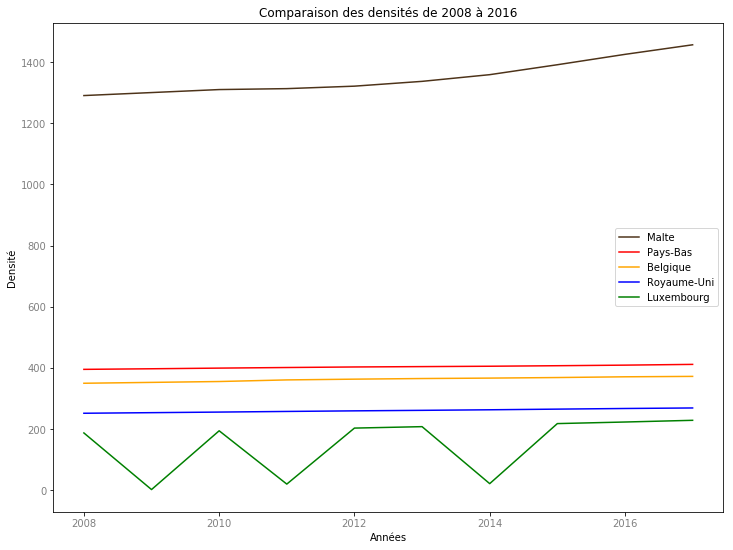

In [8]:
plt.figure(figsize=(12,9))
ax = plt.plot(Malte.TIME,Malte.Densité, color='#4d3319')
ax1 = plt.plot(PaysBas.TIME,PaysBas.Densité, color='red')
ax2 = plt.plot(Belgique.TIME,Belgique.Densité, color='orange')
ax3 = plt.plot(RoyaumeUni.TIME,RoyaumeUni.Densité, color='blue')
ax4 = plt.plot(Luxembourg.TIME,Luxembourg.Densité, color='green')
plt.ylabel("Densité",color='black')
plt.xlabel("Années", color='black')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.title("Comparaison des densités de 2008 à 2016", color='black')
plt.legend(('Malte','Pays-Bas', 'Belgique', 'Royaume-Uni', 'Luxembourg'),loc='center right')
plt.show()